<a href="https://colab.research.google.com/github/Madinanachan/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS8_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [0]:
import pandas as pd
!pip install pandas==0.23.4


In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

persons_url='https://raw.githubusercontent.com/Madinanachan/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv'



df= pd.read_csv(persons_url)
df.head()#Is there a way to delete the unnecessary counter column at the front?

df = df.rename(columns={'Unnamed: 0': 'ID'})
df.head()
#df.drop(columns='Unnamed: 0') #This is one way to do it, I also could have set the index to the ID column.

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

,ID,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


**Age V Exercise_time **

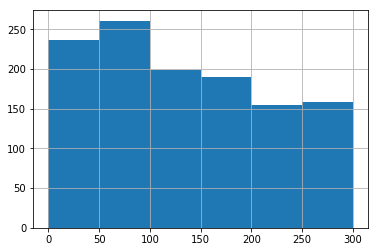

In [0]:

df['exercise_time'].hist(bins=6)



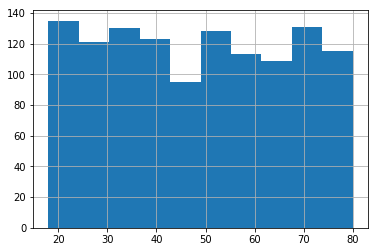

In [0]:
df['age'].hist(bins=10)

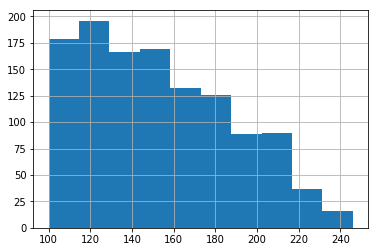

In [0]:
df['weight'].hist(bins=10)

In [0]:
time_bins = pd.cut(df['exercise_time'], 6)
age_bins=pd.cut(df['age'],10)
weight_bins=pd.cut(df['weight'],10)
crosstab=pd.crosstab(age_bins, time_bins)


# 5 equal-sized bins

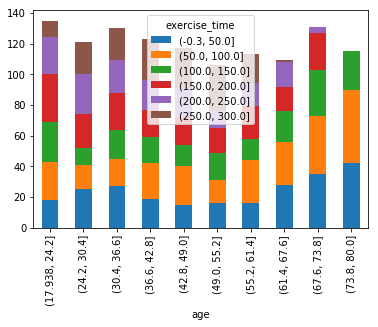

In [0]:
crosstab.plot(kind='bar',stacked=True);#This shows how many people of age ranges do different exercise time ranges. It seems at certain ages less people--which is because less people of that age were polled, false correlation-- excersize in general but more people do different time ranges

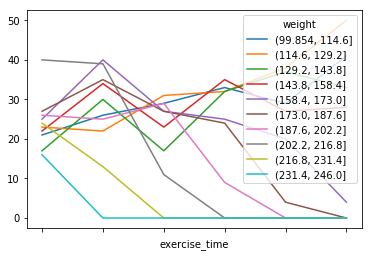

In [0]:
anotherone=pd.crosstab(time_bins,weight_bins)
anotherone.plot() #These graphs dont seem particularly helpful, asked question in stand-up about how to know which plot is best for what type of data

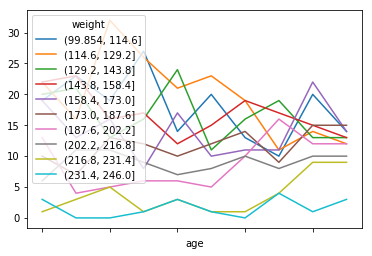

In [0]:
crosstabmad=pd.crosstab(age_bins,weight_bins)
crosstabmad.plot();

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


1. There are continuous and discrete variables, but all can be discrete with proper binning. 
2. in comments #
3. in comments #

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)